In [152]:
from mxnet import np, npx, autograd
from d2l import mxnet as d2l
from mxnet.gluon.loss import SoftmaxCrossEntropyLoss
import mxnet.gluon.nn as nn
from mxnet.gluon.trainer import Trainer
from mxnet import initializer
npx.set_np()

## Load Data

In [158]:
batch_size = 256
num_classes = 10
train_dl, test_dl = d2l.load_data_fashion_mnist(batch_size)

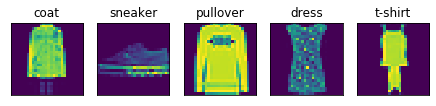

In [116]:
n = 5
batch = next(iter(train_dl))
imgs = batch[0][:n]
labels = d2l.get_fashion_mnist_labels(batch[1][:n])
d2l.show_images(np.reshape(imgs, (n, 28, 28)), num_rows=1, num_cols=n, titles=labels);

## Define Architecture

In [159]:
net = nn.Sequential()
net.add(nn.Dense(256))
net.add(nn.Dense(num_classes))
net.initialize(initializer.Normal(sigma=0.01))

## Define Loss

In [160]:
def loss_fn(yhat, y):
    scel = SoftmaxCrossEntropyLoss(from_logits=False)
    loss = scel(yhat, y)
    return loss.mean()

## Define Trainer

In [165]:
num_epochs = 2
trainer = Trainer(net.collect_params(), 'sgd', optimizer_params={'learning_rate': 0.1})

In [166]:
for epoch in range(num_epochs):
    for X, y in train_dl:
        num_samples = X.shape[0]
        X = np.reshape(X, (num_samples, -1))
        with autograd.record():
            yhat = net(X)
            loss = loss_fn(yhat, y)
        loss.backward()
        trainer.step(batch_size=1)
    print(f'Epoch: {epoch}, Loss: {loss.item()}')

Epoch: 0, Loss: 0.46787533164024353
Epoch: 1, Loss: 0.3528169095516205


## Summarize Performance

In [167]:
num_samples = 0
num_correct = 0
for X, y in test_dl:
    yhat = net(X)
    preds = np.argmax(yhat, axis=1).astype('int32')
    num_samples += X.shape[0]
    num_correct += (y == preds).sum()

In [168]:
num_correct/num_samples

array(0.8282)